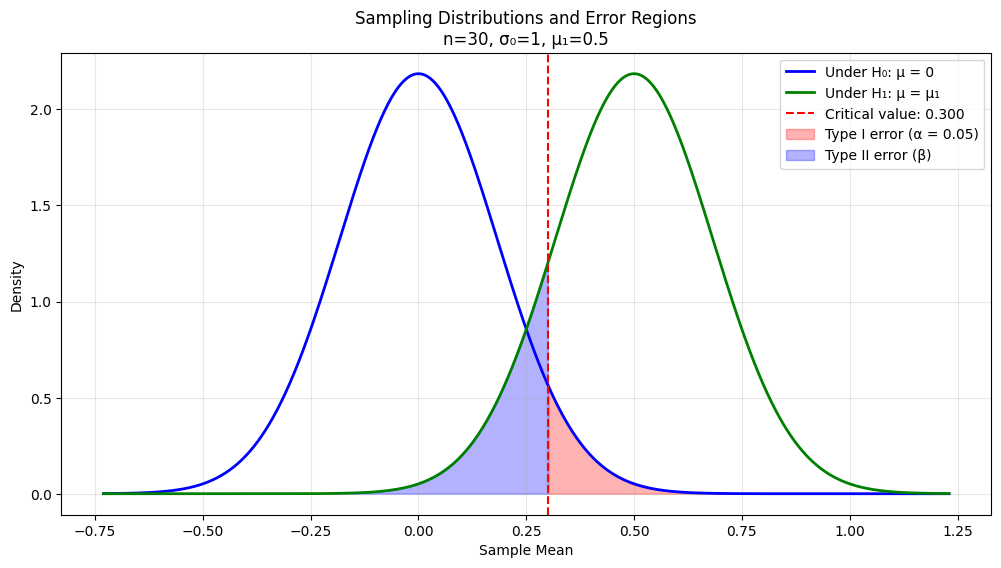

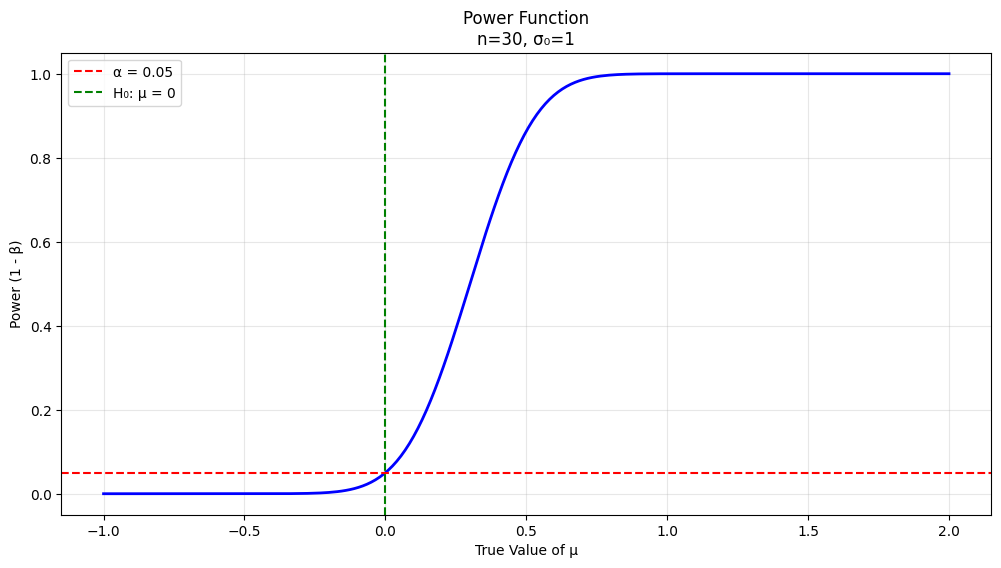

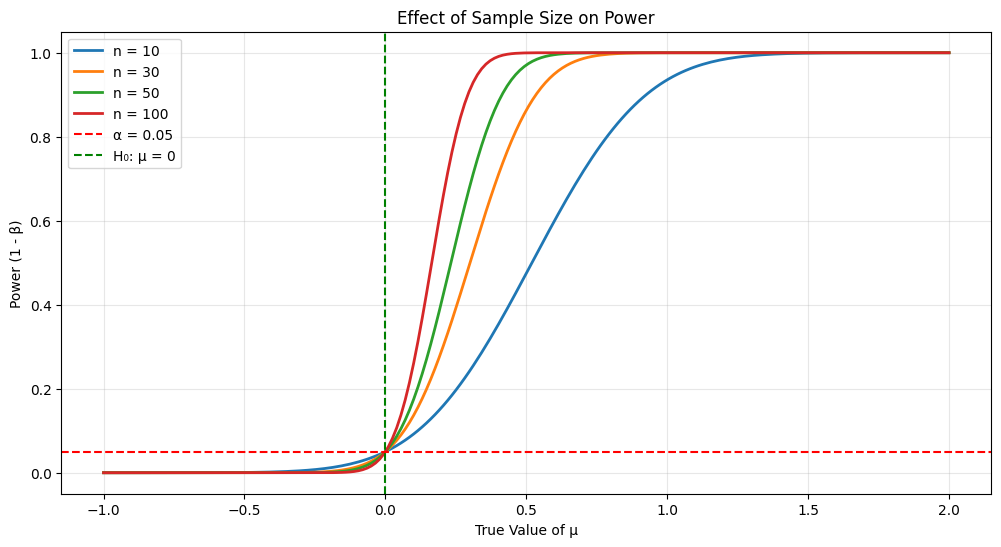

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.patches import Polygon

# Set style for better-looking plots

def plot_distributions_and_critical_region(n=30, sigma0=1, mu1=0.5, alpha=0.05):
    """
    Plot the sampling distributions under H0 and H1, showing critical region.
    
    Parameters:
    -----------
    n : int
        Sample size
    sigma0 : float
        Known population standard deviation
    mu1 : float
        Alternative hypothesis mean value
    alpha : float
        Significance level
    """
    # Calculate standard error
    se = sigma0 / np.sqrt(n)
    
    # Calculate critical value
    z_alpha = norm.ppf(1 - alpha)
    critical_value = z_alpha * se
    
    # Create x values for plotting
    x = np.linspace(-4*se, 4*se + mu1, 1000)
    
    # Calculate densities
    h0_density = norm.pdf(x, 0, se)
    h1_density = norm.pdf(x, mu1, se)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot densities
    plt.plot(x, h0_density, 'b-', label='Under H₀: μ = 0', linewidth=2)
    plt.plot(x, h1_density, 'g-', label='Under H₁: μ = μ₁', linewidth=2)
    
    # Add critical value line
    plt.axvline(x=critical_value, color='r', linestyle='--', 
                label=f'Critical value: {critical_value:.3f}')
    
    # Shade rejection region (Type I error)
    x_fill = x[x >= critical_value]
    y_fill = norm.pdf(x_fill, 0, se)
    plt.fill_between(x_fill, y_fill, alpha=0.3, color='red', 
                     label=f'Type I error (α = {alpha})')
    
    # Shade Type II error region
    x_fill_beta = x[x <= critical_value]
    y_fill_beta = norm.pdf(x_fill_beta, mu1, se)
    plt.fill_between(x_fill_beta, y_fill_beta, alpha=0.3, color='blue',
                     label='Type II error (β)')
    
    # Add labels and title
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title('Sampling Distributions and Error Regions\n'
              f'n={n}, σ₀={sigma0}, μ₁={mu1}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

def plot_power_function(n=30, sigma0=1, alpha=0.05):
    """
    Plot the power function of the test.
    
    Parameters:
    -----------
    n : int
        Sample size
    sigma0 : float
        Known population standard deviation
    alpha : float
        Significance level
    """
    # Calculate critical value
    z_alpha = norm.ppf(1 - alpha)
    
    # Create range of alternative mu values
    mu_range = np.linspace(-1, 2, 200)
    
    # Calculate power for each mu
    power = [1 - norm.cdf(z_alpha - mu/(sigma0/np.sqrt(n))) for mu in mu_range]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(mu_range, power, 'b-', linewidth=2)
    
    # Add reference lines
    plt.axhline(y=alpha, color='r', linestyle='--', 
                label=f'α = {alpha}')
    plt.axvline(x=0, color='g', linestyle='--', 
                label='H₀: μ = 0')
    
    # Add labels and title
    plt.xlabel('True Value of μ')
    plt.ylabel('Power (1 - β)')
    plt.title(f'Power Function\nn={n}, σ₀={sigma0}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

def plot_sample_size_effect(sigma0=1, mu1=0.5, alpha=0.05):
    """
    Plot power curves for different sample sizes.
    
    Parameters:
    -----------
    sigma0 : float
        Known population standard deviation
    mu1 : float
        Alternative hypothesis mean value
    alpha : float
        Significance level
    """
    # Different sample sizes to compare
    sample_sizes = [10, 30, 50, 100]
    
    # Create range of alternative mu values
    mu_range = np.linspace(-1, 2, 200)
    
    plt.figure(figsize=(12, 6))
    
    # Plot power function for each sample size
    for n in sample_sizes:
        power = [1 - norm.cdf(norm.ppf(1 - alpha) - mu/(sigma0/np.sqrt(n))) 
                for mu in mu_range]
        plt.plot(mu_range, power, label=f'n = {n}', linewidth=2)
    
    # Add reference lines
    plt.axhline(y=alpha, color='r', linestyle='--', 
                label=f'α = {alpha}')
    plt.axvline(x=0, color='g', linestyle='--', 
                label='H₀: μ = 0')
    
    # Add labels and title
    plt.xlabel('True Value of μ')
    plt.ylabel('Power (1 - β)')
    plt.title('Effect of Sample Size on Power')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

# Create the plots
plt.close('all')  # Clear any existing plots

# Plot 1: Distributions and Critical Region
fig1 = plot_distributions_and_critical_region(n=30, sigma0=1, mu1=0.5, alpha=0.05)

# Plot 2: Power Function
fig2 = plot_power_function(n=30, sigma0=1, alpha=0.05)

# Plot 3: Sample Size Effect
fig3 = plot_sample_size_effect(sigma0=1, mu1=0.5, alpha=0.05)

# Show all plots
plt.show()

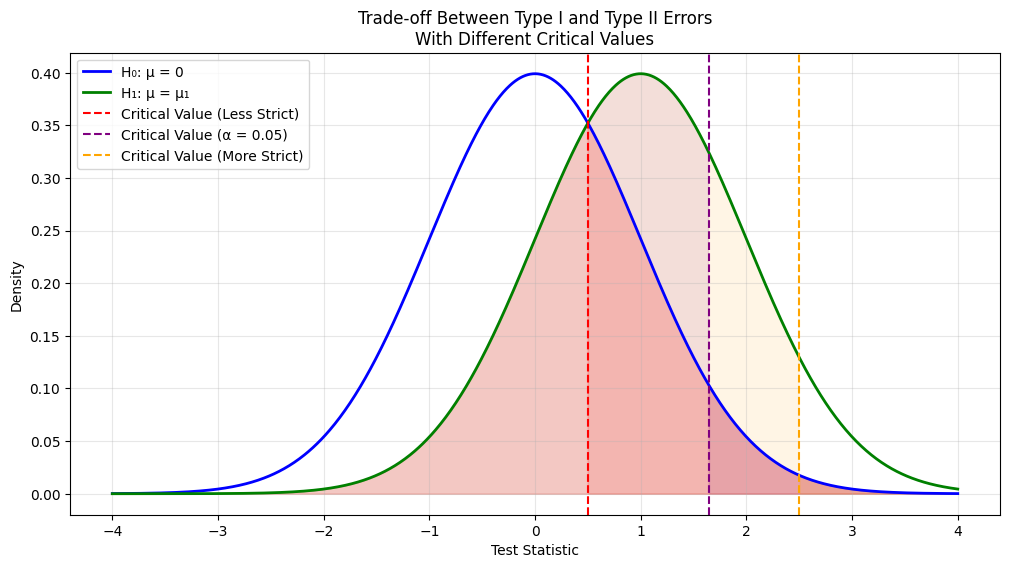

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_error_tradeoff(mu1=1, sigma=1):
    """
    Plot showing how moving the critical value affects Type I and Type II errors.
    """

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Generate x values
    x = np.linspace(-4, 4, 1000)
    
    # Calculate densities
    h0_density = norm.pdf(x, 0, sigma)
    h1_density = norm.pdf(x, mu1, sigma)
    
    # Plot distributions
    ax.plot(x, h0_density, 'b-', label='H₀: μ = 0', linewidth=2)
    ax.plot(x, h1_density, 'g-', label='H₁: μ = μ₁', linewidth=2)
    
    # Add three different critical values
    criticals = [0.5, 1.645, 2.5]  # loose, standard (α=0.05), strict
    colors = ['red', 'purple', 'orange']
    labels = ['Less Strict', 'α = 0.05', 'More Strict']
    
    for c, color, label in zip(criticals, colors, labels):
        ax.axvline(x=c, color=color, linestyle='--', label=f'Critical Value ({label})')
        
        # Shade Type I error
        x_type1 = x[x >= c]
        y_type1 = norm.pdf(x_type1, 0, sigma)
        ax.fill_between(x_type1, y_type1, alpha=0.2, color=color)
        
        # Shade Type II error
        x_type2 = x[x <= c]
        y_type2 = norm.pdf(x_type2, mu1, sigma)
        ax.fill_between(x_type2, y_type2, alpha=0.1, color=color)
    
    ax.set_xlabel('Test Statistic')
    ax.set_ylabel('Density')
    ax.set_title('Trade-off Between Type I and Type II Errors\nWith Different Critical Values')
    ax.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

# Create the plot
plot_error_tradeoff()
plt.show()


Required sample sizes for different effect sizes (α=0.05, Power=0.8):
Effect size δ = 0.2: n = 155
Effect size δ = 0.5: n = 25
Effect size δ = 0.8: n = 10


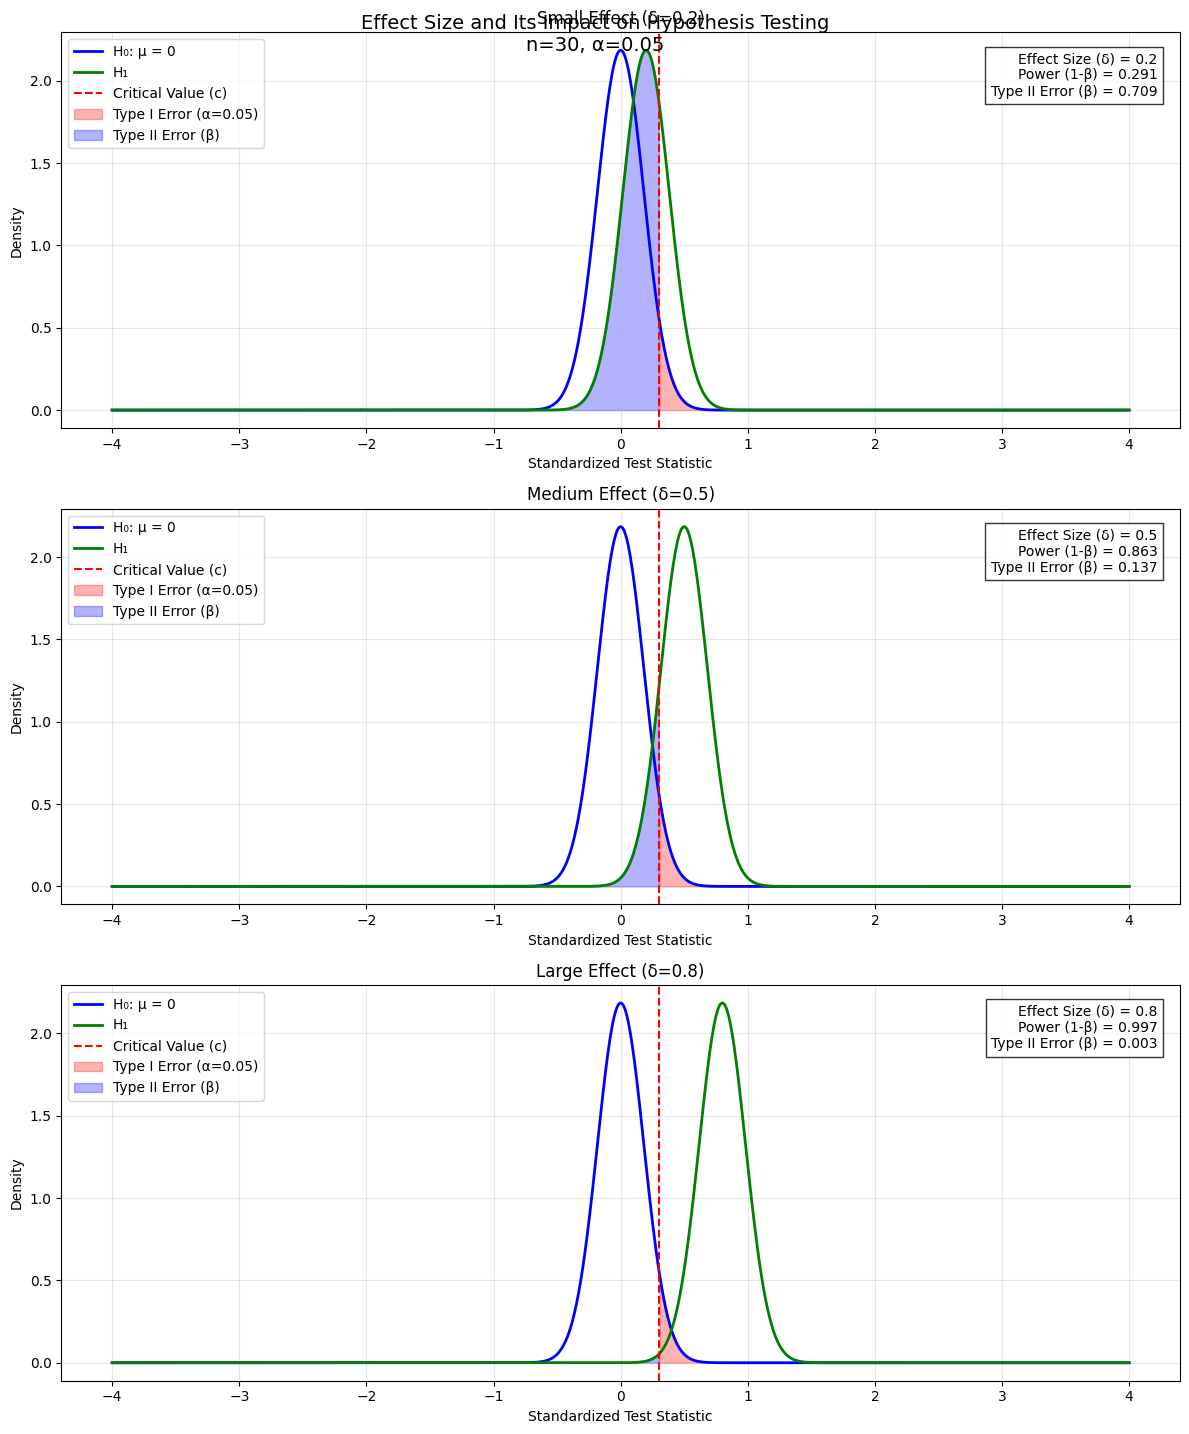

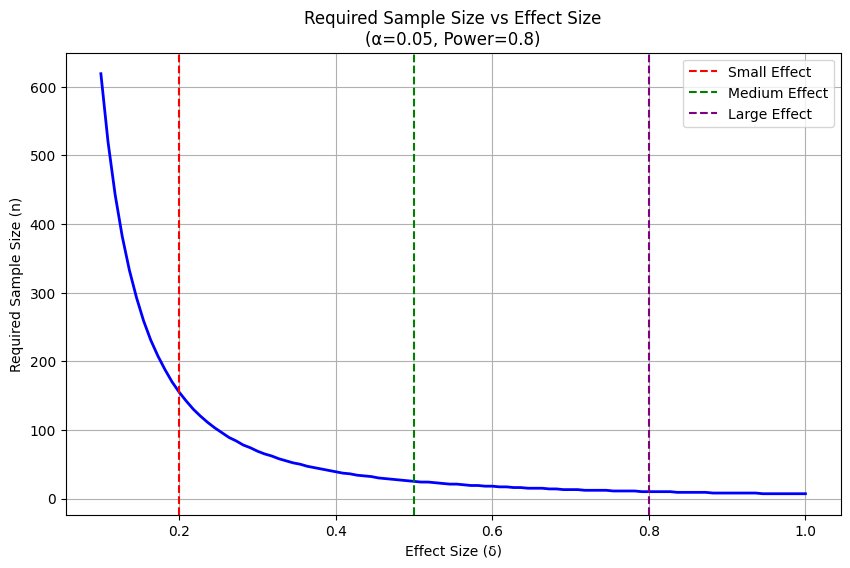

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.patches import Polygon

def plot_effect_size_comparison(n=30, alpha=0.05):
    """
    Create a comprehensive visualization of different effect sizes and their impact
    on hypothesis testing.
    
    Parameters:
    -----------
    n : int
        Sample size
    alpha : float
        Significance level
    """

    
    # Create figure with three subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle('Effect Size and Its Impact on Hypothesis Testing\n' +
                f'n={n}, α={alpha}', fontsize=14, y=0.95)
    
    # Effect sizes to demonstrate
    effect_sizes = [0.2, 0.5, 0.8]  # Small, Medium, Large
    labels = ['Small Effect (δ=0.2)', 'Medium Effect (δ=0.5)', 'Large Effect (δ=0.8)']
    
    # Generate x values for plotting
    x = np.linspace(-4, 4, 1000)
    
    # Calculate standard error
    se = 1/np.sqrt(n)
    
    # Calculate critical value (same for all effect sizes)
    critical_value = norm.ppf(1-alpha) * se
    
    for ax, delta, label in zip(axes, effect_sizes, labels):
        # Calculate means for null and alternative hypotheses
        mu0 = 0
        mu1 = delta  # Effect size directly gives the alternative mean in standardized units
        
        # Calculate densities
        h0_density = norm.pdf(x, mu0, se)
        h1_density = norm.pdf(x, mu1, se)
        
        # Plot the distributions
        ax.plot(x, h0_density, 'b-', label='H₀: μ = 0', linewidth=2)
        ax.plot(x, h1_density, 'g-', label='H₁', linewidth=2)
        
        # Add vertical line for critical value
        ax.axvline(x=critical_value, color='r', linestyle='--', 
                  label=f'Critical Value (c)')
        
        # Shade Type I error region
        x_type1 = x[x >= critical_value]
        y_type1 = norm.pdf(x_type1, mu0, se)
        ax.fill_between(x_type1, y_type1, alpha=0.3, color='red',
                       label=f'Type I Error (α={alpha})')
        
        # Shade Type II error region
        x_type2 = x[x <= critical_value]
        y_type2 = norm.pdf(x_type2, mu1, se)
        ax.fill_between(x_type2, y_type2, alpha=0.3, color='blue',
                       label='Type II Error (β)')
        
        # Calculate and display power
        power = 1 - norm.cdf(critical_value, mu1, se)
        
        # Add text box with key statistics
        stats_text = (
            f'Effect Size (δ) = {delta}\n'
            f'Power (1-β) = {power:.3f}\n'
            f'Type II Error (β) = {1-power:.3f}'
        )
        ax.text(0.98, 0.95, stats_text,
                transform=ax.transAxes,
                horizontalalignment='right',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8))
        
        # Add labels and legend
        ax.set_title(label)
        ax.set_xlabel('Standardized Test Statistic')
        ax.set_ylabel('Density')
        ax.legend(loc='upper left')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def calculate_required_sample_size(effect_size, alpha=0.05, power=0.8):
    """
    Calculate required sample size for a given effect size and desired power.
    
    Parameters:
    -----------
    effect_size : float
        Standardized effect size (δ)
    alpha : float
        Significance level
    power : float
        Desired power (1-β)
        
    Returns:
    --------
    int
        Required sample size
    """
    z_alpha = norm.ppf(1-alpha)
    z_power = norm.ppf(power)
    n = np.ceil(((z_alpha + z_power)/effect_size)**2)
    return int(n)

def plot_sample_size_requirements():
    """
    Create a visualization of required sample sizes for different effect sizes.
    """
    effect_sizes = np.linspace(0.1, 1, 100)
    sample_sizes = [calculate_required_sample_size(d) for d in effect_sizes]
    
    plt.figure(figsize=(10, 6))
    plt.plot(effect_sizes, sample_sizes, 'b-', linewidth=2)
    plt.axvline(x=0.2, color='r', linestyle='--', label='Small Effect')
    plt.axvline(x=0.5, color='g', linestyle='--', label='Medium Effect')
    plt.axvline(x=0.8, color='purple', linestyle='--', label='Large Effect')
    
    plt.title('Required Sample Size vs Effect Size\n(α=0.05, Power=0.8)')
    plt.xlabel('Effect Size (δ)')
    plt.ylabel('Required Sample Size (n)')
    plt.grid(True)
    plt.legend()
    
    return plt.gcf()

# Create the visualizations
fig1 = plot_effect_size_comparison(n=30)
fig2 = plot_sample_size_requirements()

# Print some example calculations
print("\nRequired sample sizes for different effect sizes (α=0.05, Power=0.8):")
effect_sizes = [0.2, 0.5, 0.8]
for delta in effect_sizes:
    n = calculate_required_sample_size(delta)
    print(f"Effect size δ = {delta:.1f}: n = {n}")

plt.show()